### This notebook calculates various aggregate metrics

In [29]:
%pylab inline
from IPython.display import display, clear_output
import sys
import time
import pickle
import cgi
import urlparse
import utils
import collections
import csv

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

pylab.rcParams['figure.figsize'] = 16, 12

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### What are the most popular (# of packages) hosts across packages?

In [30]:
host_count = collections.defaultdict(int) # host : number of packages with that host
packages_seen = {}

counter = 0
for run in utils.runs.find():
    clear_output(wait=True)
    print(counter)
    sys.stdout.flush()
    counter += 1
    
    package_title = run["package_title"]
    
    if package_title in packages_seen:
        continue
        
    packages_seen[package_title] = True
    
    requests = [pickle.loads(x) for x in run["requests"]]
    
    hosts_seen = {}

    for request in requests:
        if request.host in hosts_seen:
            continue
        hosts_seen[request.host] = True
        host_count[request.host] += 1

2424


In [31]:
host_count_flat = [(key, val) for key, val in host_count.iteritems()]
top_hosts = sorted(host_count_flat, key=lambda x: x[1], reverse=True)

In [32]:
top_hosts

[('www.google.com', 1664),
 ('ssl.google-analytics.com', 622),
 ('googleads.g.doubleclick.net', 521),
 ('graph.facebook.com', 462),
 ('settings.crashlytics.com', 364),
 ('csi.gstatic.com', 349),
 ('pagead2.googlesyndication.com', 334),
 ('data.flurry.com', 297),
 ('fonts.googleapis.com', 295),
 ('fonts.gstatic.com', 294),
 ('lh3.ggpht.com', 289),
 ('lh5.ggpht.com', 262),
 ('lh4.ggpht.com', 261),
 ('e.crashlytics.com', 245),
 ('lh6.ggpht.com', 240),
 ('b.scorecardresearch.com', 178),
 ('clients4.google.com', 155),
 ('www.googleadservices.com', 146),
 ('lh3.googleusercontent.com', 137),
 ('tpc.googlesyndication.com', 133),
 ('e.admob.com', 109),
 ('www.google-analytics.com', 108),
 ('m.facebook.com', 102),
 ('pubads.g.doubleclick.net', 94),
 ('www.facebook.com', 90),
 ('ad.doubleclick.net', 87),
 ('api.crittercism.com', 84),
 ('api.facebook.com', 81),
 ('track.appsflyer.com', 75),
 ('fbstatic-a.akamaihd.net', 75),
 ('device-api.urbanairship.com', 73),
 ('api.appsflyer.com', 69),
 ('s3.am

### What are the most popular (# of packages) hosts across packages, with subdomains aggregated?

In [33]:
root_host_count = collections.defaultdict(int)

for host in host_count:
    hostname = host.split(".")
    try:
        root_host = ".".join(len(hostname[-2]) < 4 and hostname[-3:] or hostname[-2:])
    except:
        continue
    
    root_host_count[root_host] += host_count[host]

In [34]:
root_host_count_flat = [(key, val) for key, val in root_host_count.iteritems()]
top_root_hosts = sorted(root_host_count_flat, key=lambda x: x[1], reverse=True)

In [35]:
for domain, count in top_root_hosts[:200]:
    print domain

google.com
ggpht.com
doubleclick.net
gstatic.com
facebook.com
google-analytics.com
crashlytics.com
googleapis.com
googlesyndication.com
flurry.com
akamaihd.net
googleadservices.com
intellicast.com
scorecardresearch.com
mobilecore.com
urbanairship.com
admob.com
googleusercontent.com
amazonaws.com
appsflyer.com
cloudfront.net
startappexchange.com
yahoo.com
crittercism.com
youtube.com
amazon-adsystem.com
ytimg.com
umeng.com
mydas.mobi
mixpanel.com
2mdn.net
fiksu.com
mopub.com
adnxs.com
twitter.com
mobileapptracking.com
googletagmanager.com
vrvm.com
112.2o7.net
parse.com
ad-x.co.uk
googlevideo.com
omtrdc.net
adobe.com
optimizely.com
newrelic.com
inmobi.com
appspot.com
adjust.io
localytics.com
rubiconproject.com
ksmobile.com
kochava.com
bluekai.com
facebook.net
advertising.com
yemonisoni.com
typekit.net
microsoft.com
amazon.com
scmpacdn.com
moatads.com
castplatform.com
mysearch-online.com
picsart.com
applovin.com
demdex.net
goforandroid.com
wdtinc.com
uservoice.com
tapjoyads.com
gvt1.com
qu

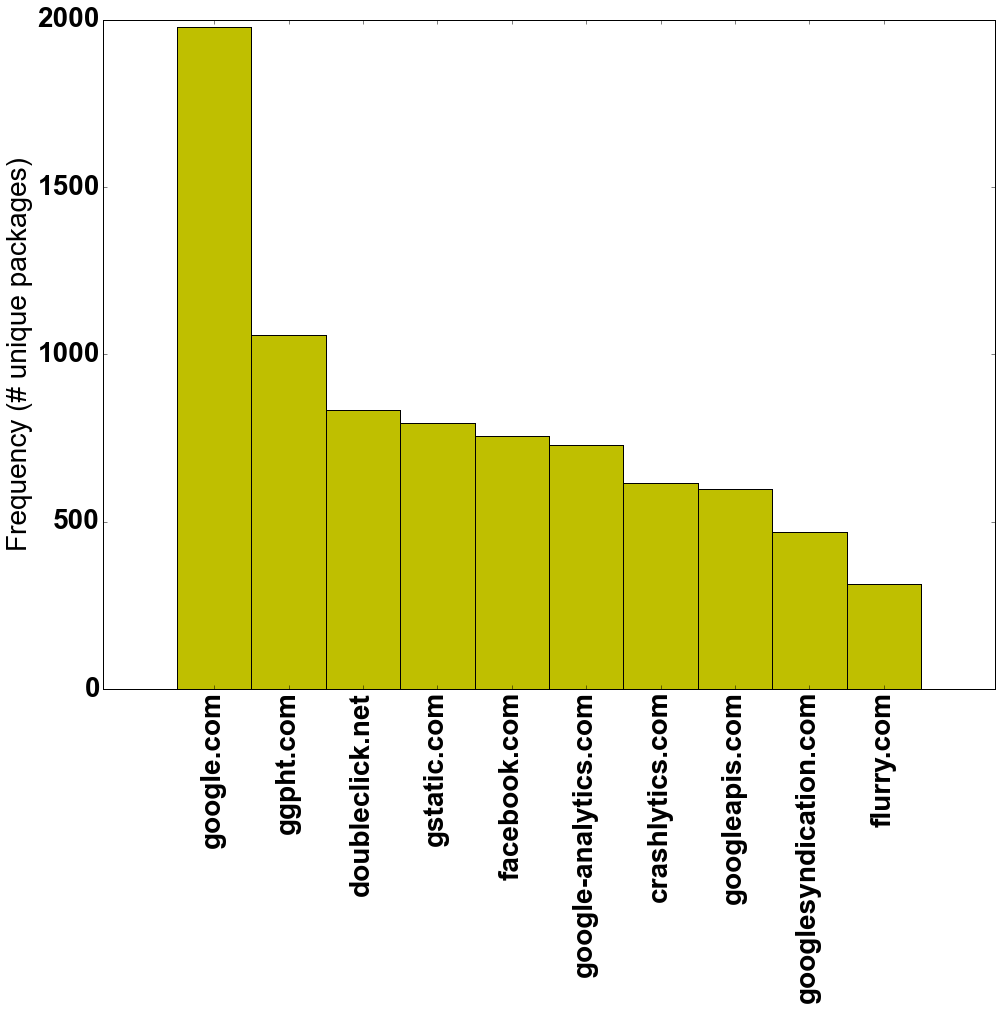

In [36]:
pylab.rcParams['figure.figsize'] = 16, 12

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

data = top_root_hosts[:10]
N = len(data)
x = np.arange(1, N+1)
y = [num for (s, num) in data]
labels = [s for (s, num) in data]
width = 1
bar1 = plt.bar(x, y, width, color="y")
plt.ylabel('Frequency (# unique packages)')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=90)
plt.show()

### Let's recalculate that with hostname-to-company name resolution!

In [37]:
domain_lookup = {}

with open("../company-resolution/company_cache.csv", 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        domain_lookup[row[0]] = row[1].decode("utf8")

In [38]:
company_count = collections.defaultdict(int) # company : number of packages with that host

counter = 0
for run in utils.runs.find():
    clear_output(wait=True)
    print(counter)
    sys.stdout.flush()
    counter += 1
    
    package_title = run["package_title"]
        
    requests = [pickle.loads(x) for x in run["requests"]]
    
    companies_seen = {}

    for request in requests:
        hostname = request.host.split(".")
        try:
            root_host = ".".join(len(hostname[-2]) < 4 and hostname[-3:] or hostname[-2:])
        except:
            continue
            
        if root_host not in domain_lookup:
            continue
            
        company = domain_lookup[root_host]

        if company in companies_seen:
            continue
            
        companies_seen[company] = True
        
        company_count[company] += 1
        
del company_count['']
    
company_count_flat = [(key, val) for key, val in company_count.iteritems()]
top_companies = sorted(company_count_flat, key=lambda x: x[1], reverse=True)

2424


In [39]:
company_count

defaultdict(<type 'int'>, {u'Millennial Media, Inc.': 29, u' Amazon Technologies, Inc.': 51, u' Adobe Systems Incorporated': 107, u' Microsoft Corporation': 28, u' Domains By Proxy, LLC': 40, u' WHOISGUARD, INC.': 57, u' Yahoo! Inc.': 51, u' The Rubicon Project, Inc. ': 30, u' PLAYXPERT ': 44, u' Crashlytics, Inc.': 366, u' VERVE WIRELESS ': 19, u' WSI Corporation': 25, u' TMRG, Inc': 188, u' Oracle Corporation': 44, u' Quantcast': 18, u' Contact Privacy Inc. Customer 0137697136': 10, u' WHOISGUARD, INC. ': 37, u' Beijing Ruixun Lingtong Technology Co., Ltd. (\u5317\u4eac\u9510\u8baf\u7075\u901a\u79d1\u6280\u6709\u9650\u516c\u53f8)': 64, u' Privacy Protection Service INC d/b/a PrivacyProtect.org': 42, u' Google Inc.': 1725, u' Twitter, Inc.': 36, u' Domains By Proxy, LLC ': 168, u' Akamai Technologies, inc.': 189, u' AppsFlyer': 88, u' AOL Advertising Inc.': 16, u' IRONSOURCE ISRAEL (2011) LTD': 42, u' URBAN AIRSHIP': 80, u' Whois Privacy Protection Service, Inc. ': 25, u' Amazon.com, 

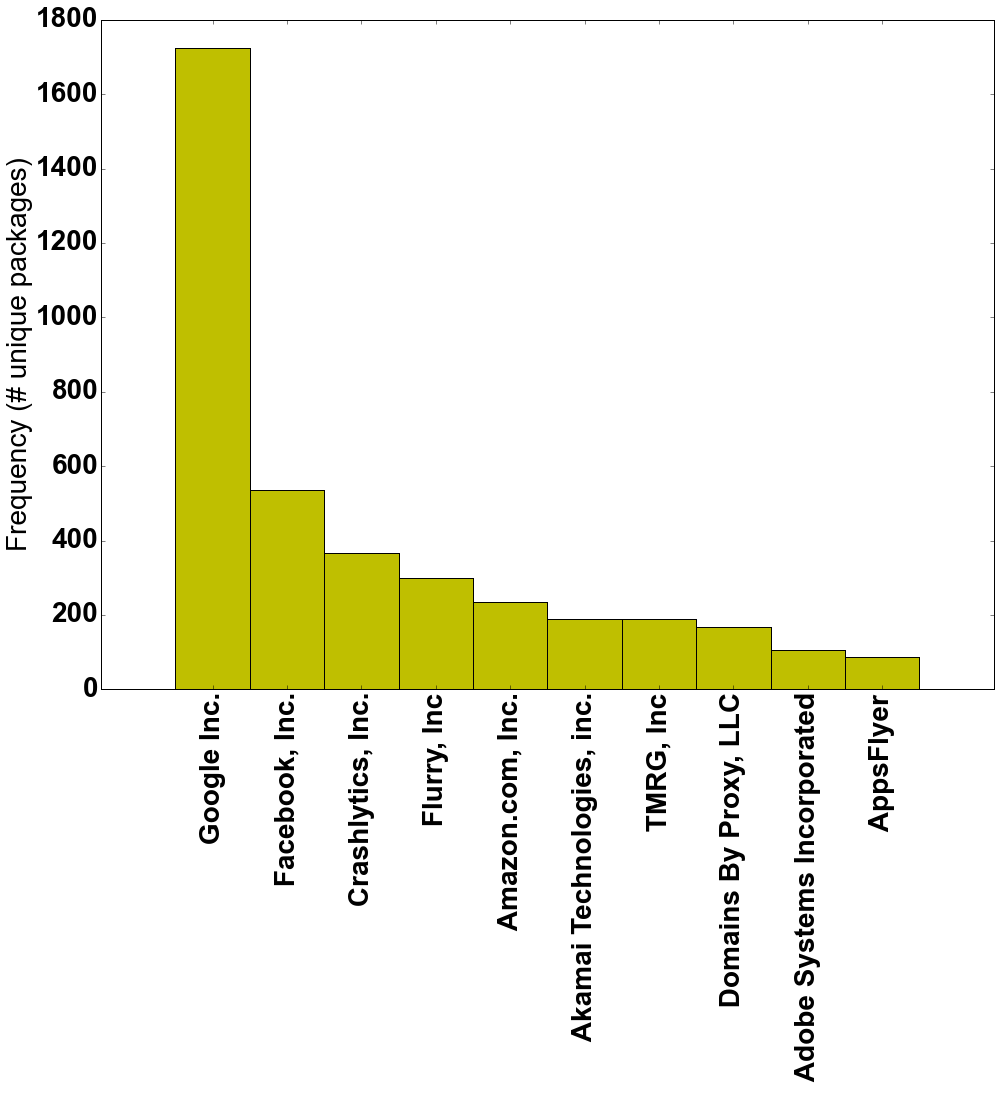

In [40]:
pylab.rcParams['figure.figsize'] = 16, 12

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

data = top_companies[:10]
N = len(data)
x = np.arange(1, N+1)
y = [num for (s, num) in data]
labels = [s for (s, num) in data]
width = 1
bar1 = plt.bar(x, y, width, color="y")
plt.ylabel('Frequency (# unique packages)')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=90)
plt.show()

### Which packages make the most network requests?

In [41]:
package_request_count = {} # package_title : number of requests

counter = 0
for run in utils.runs.find():
    clear_output(wait=True)
    print(counter)
    sys.stdout.flush()
    counter += 1
    
    package_title = run["package_title"]
    
    if package_title in package_request_count:
        continue
        
    package_request_count[package_title] = len(run["requests"])

2424


In [42]:
package_request_count_flat = [(key, val) for key, val in package_request_count.iteritems()]
top_package_request = sorted(package_request_count_flat, key=lambda x: x[1], reverse=True)

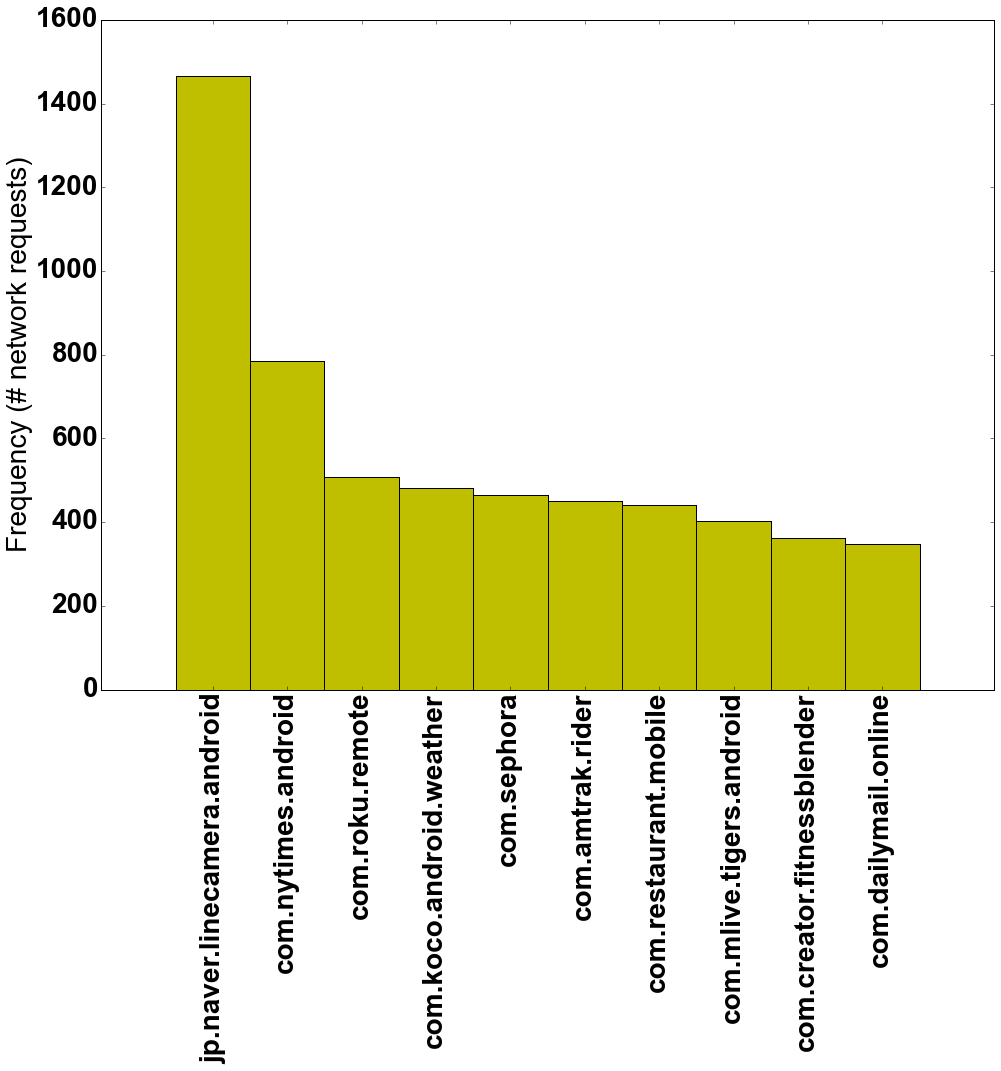

In [43]:
data = top_package_request[:10]
N = len(data)
x = np.arange(1, N+1)
y = [num for (s, num) in data]
labels = [s for (s, num) in data]
width = 1
bar1 = plt.bar(x, y, width, color="y")
plt.ylabel('Frequency (# network requests)')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=90)
plt.show()

In [44]:
expression = "run['package_title'] == 'com.roku.remote'"
request_data = utils.fetch_filtered_requests(expression, limit=10)
utils.print_requests(request_data)

===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.2
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.1
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.4
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.5
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.3
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.7
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.9
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.6
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.8
Path: /
Content: 
===
Run ID: 1429911216
Package: com.roku.remote
Scheme: http
Host: 10.9.142.11
Path: /
Content: 
===
Run ID: 1429911216
Package: com.rok

### Let's present mean network requests by category

In [45]:
# load category dictionary
package_categories = {}

with open("../apk-categorizer/package_categories.csv", 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[1] != "#":
            package_categories[row[0]] = row[1]


In [46]:
network_request_category_count = {} # category : (total requests, total apps)

counter = 0
for run in utils.runs.find():
    clear_output(wait=True)
    print(counter)
    sys.stdout.flush()
    counter += 1
    
    package_title = run["package_title"]
    
    num_requests = len(run["requests"])
    
    if package_title not in package_categories:
        continue
    
    category = package_categories[package_title]
    
    if category not in network_request_category_count:
        network_request_category_count[category] = [0,0]
        
    network_request_category_count[category][0] += num_requests
    network_request_category_count[category][1] += 1

2424


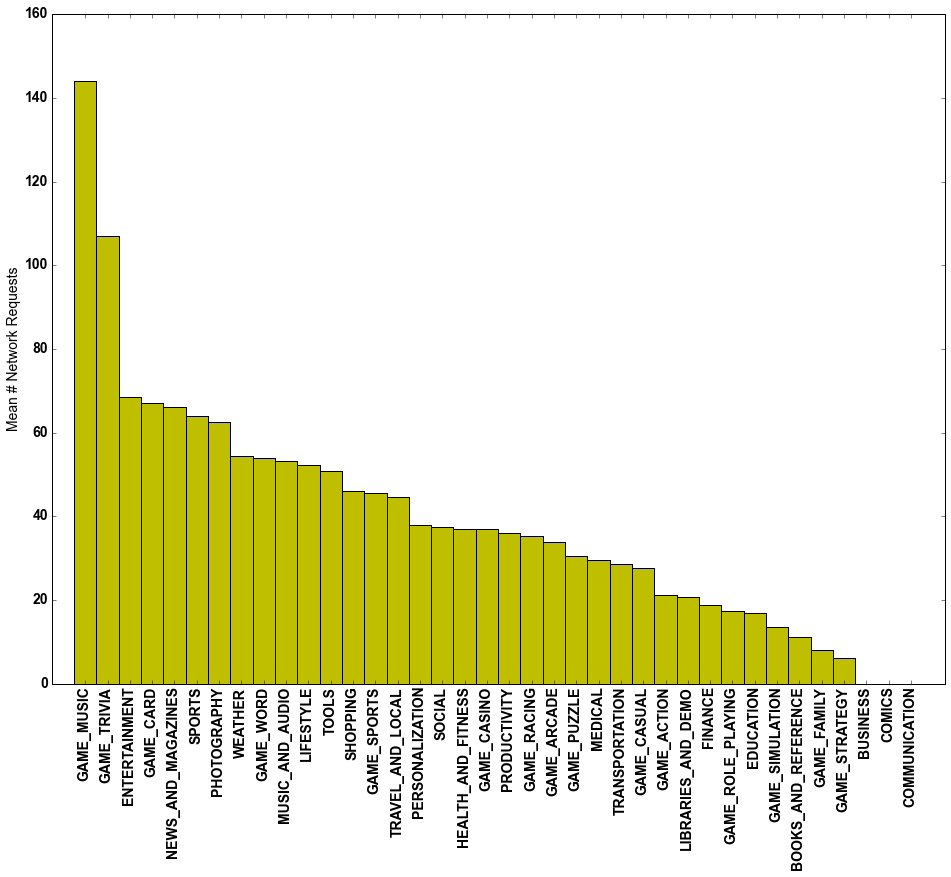

In [47]:
pylab.rcParams['figure.figsize'] = 16, 12

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

mean_network_request_category = {} # category: mean number of network requests

for category in network_request_category_count:
    mean_network_request_category[category] = network_request_category_count[category][0] / float(network_request_category_count[category][1])

data = sorted(mean_network_request_category.items(), key=lambda x: x[1], reverse=True)
N = len(data)
x = np.arange(1, N+1)
y = [num for (s, num) in data]
labels = [s for (s, num) in data]
width = 1
bar1 = plt.bar(x, y, width, color="y")
plt.ylabel('Mean # Network Requests')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=90)
plt.show()

### Let's look into each domain's network trafficm

In [28]:
request_data = utils.fetch_filtered_requests("'www.googleadservices.com' in request.host", limit=10)
utils.print_requests(request_data)

===
Run ID: 1429904025
Package: com.zoodles.gamesplayer
Scheme: https
Host: www.googleadservices.com
Path: /pagead/conversion/1001680686/?bundleid=com.google.android.youtube&appversion=10.11.55&osversion=5.0.1&sdkversion=ct-sdk-a-v2.2.1&gms=1&lat=1&timestamp=1429904028.813&remarketing_only=1&usage_tracking_enabled=0&rdid=dcd27149-60cb-49d7-bd70-775e01b945a8&data.screen_name=%3CAndroid_YT_Open_App%3E
Content: 
===
Run ID: 1430063837
Package: com.hertz
Scheme: https
Host: www.googleadservices.com
Path: /pagead/conversion/1069042913/?value=&currency_code=&label=purchase&guid=ON&script=0
Content: 
===
Run ID: 1430063837
Package: com.hertz
Scheme: https
Host: www.googleadservices.com
Path: /pagead/conversion_async.js
Content: 
===
Run ID: 1430020990
Package: com.appxy.tinyscanfree
Scheme: https
Host: www.googleadservices.com
Path: /pagead/conversion/1001680686/?bundleid=com.google.android.youtube&appversion=10.14.56&osversion=5.0.1&sdkversion=ct-sdk-a-v2.2.1&gms=1&lat=1&timestamp=1430021008

In [24]:
request_data = utils.fetch_filtered_requests("'facebook.com' in request.host and request.scheme == 'http'", limit=10)
utils.print_requests(request_data)

KeyboardInterrupt: 

In [26]:
request_data = utils.fetch_filtered_requests("'facebook.com' in request.host", limit=1000)

In [27]:
utils.print_requests(request_data, limit=100)

===
Run ID: 1430068029
Package: com.waze
Scheme: https
Host: graph.facebook.com
Path: /v2.2/343050668156?fields=supports_attribution%2Csupports_implicit_sdk_logging%2Cgdpv4_nux_content%2Cgdpv4_nux_enabled%2Candroid_dialog_configs&format=json&sdk=android
Content: 
===
Run ID: 1430068029
Package: com.waze
Scheme: https
Host: graph.facebook.com
Path: /v2.2/343050668156/activities?format=json&sdk=android
Content: --3i2ndDfv2rTHiSisAbouNdArYfORhtTPEefj3q2f
Content-Disposition: form-data; name="format"

json
--3i2ndDfv2rTHiSisAbouNdArYfORhtTPEefj3q2f
Content-Disposition: form-data; name="sdk"

android
--3i2ndDfv2rTHiSisAbouNdArYfORhtTPEefj3q2f
Content-Disposition: form-data; name="auto_publish"

false
--3i2ndDfv2rTHiSisAbouNdArYfORhtTPEefj3q2f
Content-Disposition: form-data; name="application_package_name"

com.waze
--3i2ndDfv2rTHiSisAbouNdArYfORhtTPEefj3q2f
Content-Disposition: form-data; name="application_tracking_enabled"

true
--3i2ndDfv2rTHiSisAbouNdArYfORhtTPEefj3q2f
Content-Dispositio